In [37]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
sys.path.append('/Users/smil/Projects/cato/scripts/')
from load_datasets import read_1d_dataset
sns.set_context('talk')
import pint
ureg = pint.UnitRegistry()

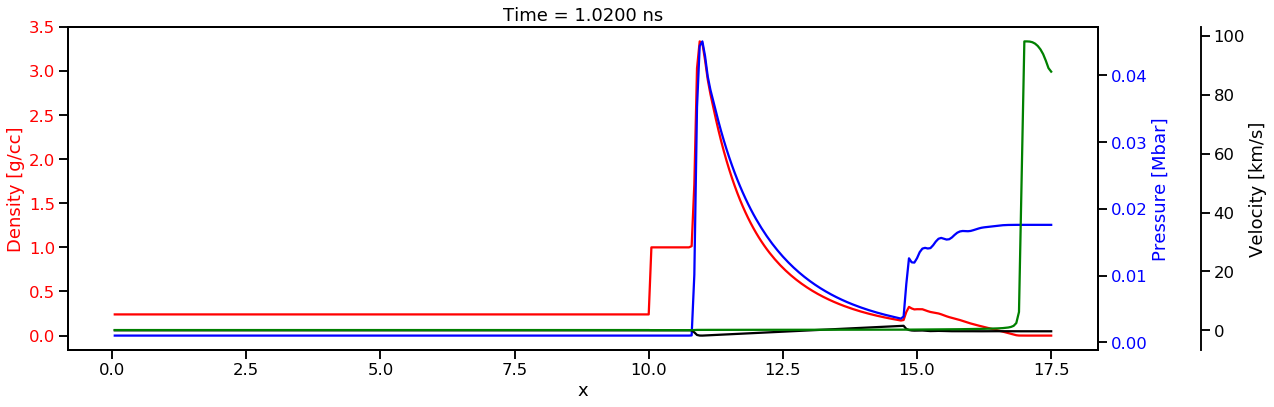

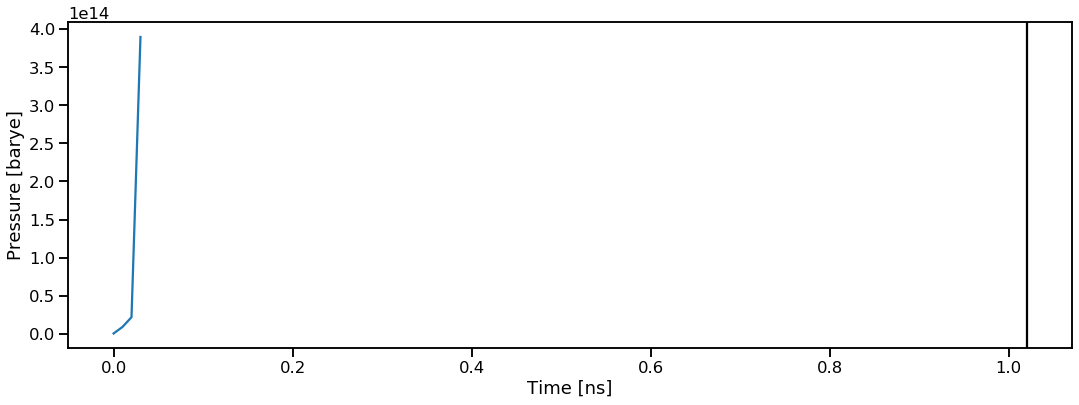

In [232]:
ds = read_1d_dataset(folder='.', units='icf')
gamma = 1.4
ds['Sound Speed'] = np.sqrt(gamma*ds.Pressure/ds.Density)
ds['Mach Number'] = np.abs(ds.x_velocity)/ds['Sound Speed']

fig, rho_ax = plt.subplots(figsize=(18,6))
p_ax = rho_ax.twinx()

t=-1

color = 'r'
ds.Density[t].plot(ax=rho_ax,color=color)
rho_ax.set_ylabel('Density [g/cc]', color=color)
rho_ax.tick_params(axis='y', labelcolor=color)
rho_ax.set_title('')
color='b'
ds.Pressure[t].plot(ax=p_ax,color=color)
p_ax.set_ylabel('Pressure [Mbar]', color=color)
p_ax.tick_params(axis='y', labelcolor=color)
p_ax.set_title('')

v_ax = rho_ax.twinx()
color='k'
ds.x_velocity[t].plot(ax=v_ax, color=color)

ds['Sound Speed'][t].plot(ax=v_ax, color='g')

v_ax.set_ylabel('Velocity [km/s]', color=color)
v_ax.spines["right"].set_position(("axes", 1.1))
v_ax.tick_params(axis='y', labelcolor=color)
# v_ax.set_ylim(-10,20)
v_ax.set_title('')
plt.title(f"Time = {ds.time[t].data:.4f} ns")

# plt.xlim(45,55)

plt.tight_layout()
plt.show()

pulse = np.loadtxt('energy_input.dat')
plt.figure(figsize=(18,6))

time = (pulse[:,0] * ureg('s')).to('ns').m

p = (pulse[:,1] * ureg('barye')).m


plt.plot(time,p)
plt.axvline(x=ds.time[t].data, color='k')
plt.xlabel('Time [ns]')
plt.ylabel('Pressure [barye]')
plt.show()

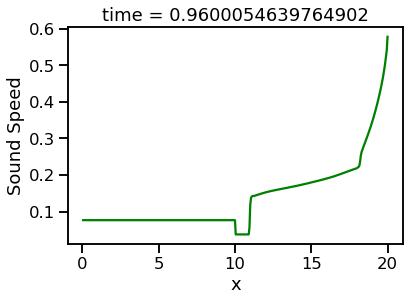

In [193]:
ds['Sound Speed'][t].plot(color='g')

# (np.abs(ds.x_velocity[t]) + ds['Sound Speed'][t]).plot(color='r')
plt.show()

In [194]:
ds.Density[-1].argmin()

<xarray.DataArray 'Density' ()>
array(399)
Coordinates:
    time     float64 0.96

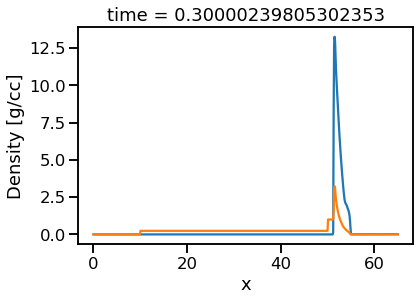

In [60]:
ds['Mach Number'][-1].plot()
ds.Density[-1].plot()

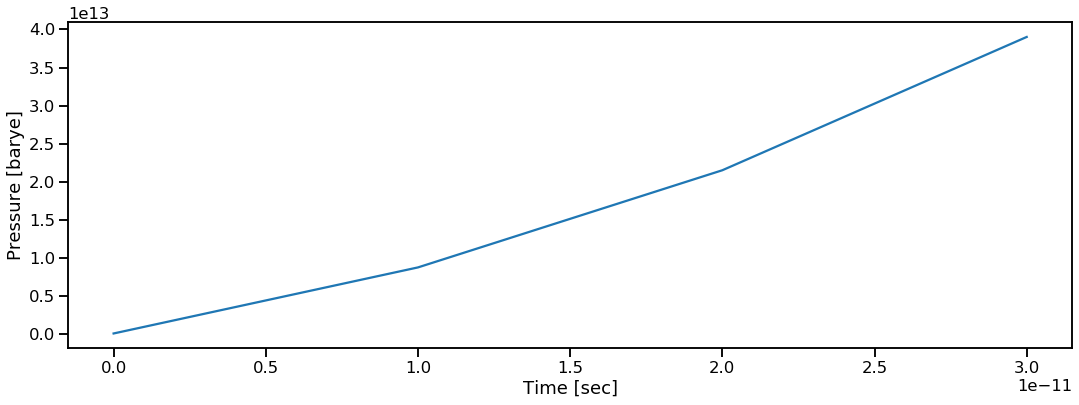

In [160]:
pulse = np.loadtxt('energy_input.dat')
plt.figure(figsize=(18,6))
plt.plot(pulse[:,0], pulse[:,1])
# plt.xlim(0,2e-5)
plt.xlabel('Time [sec]')
plt.ylabel('Pressure [barye]')
plt.show()